# Semih AKMEŞE

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
data = pd.read_csv(r"C:\Users\Semih\Desktop\winequality.csv")

In [92]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [94]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [95]:
data.isna().sum() #There is no missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [96]:
data.isna().sum().sum()

0

In [97]:
#Quality is gonna our label
print("Number of quality output :",data.quality.nunique())
print("Quality metrics :",data.quality.unique())
print("3,4,5 --> Bad (0)")
print("6,7,8 --> Good (1)")


Number of quality output : 6
Quality metrics : [5 6 7 4 8 3]
3,4,5 --> Bad (0)
6,7,8 --> Good (1)


In [98]:
#We can merge our outputs as good and bad by grouping 3 items
data[['quality']] = data['quality'].apply(lambda x : (x - x) if int(x) < 6 else ((x - x) + 1)) # In this command we apply that if the quality value
#smaller than 6 our outcome is gonna be value - value = 0 else will be 1 

In [99]:
data["quality"].value_counts()

1    855
0    744
Name: quality, dtype: int64

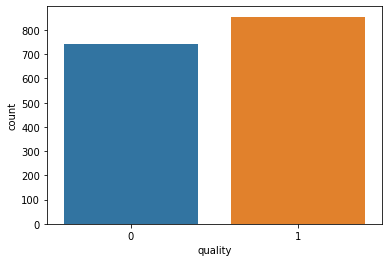

In [100]:
sns.countplot(data['quality'])

In [101]:
#Splitting the Quality column 
datax = data.drop("quality",axis = 1)
datay = data["quality"]

### Visualizing and Analyzing Data
- We gonna check the effects features on quality by using visualizing tools

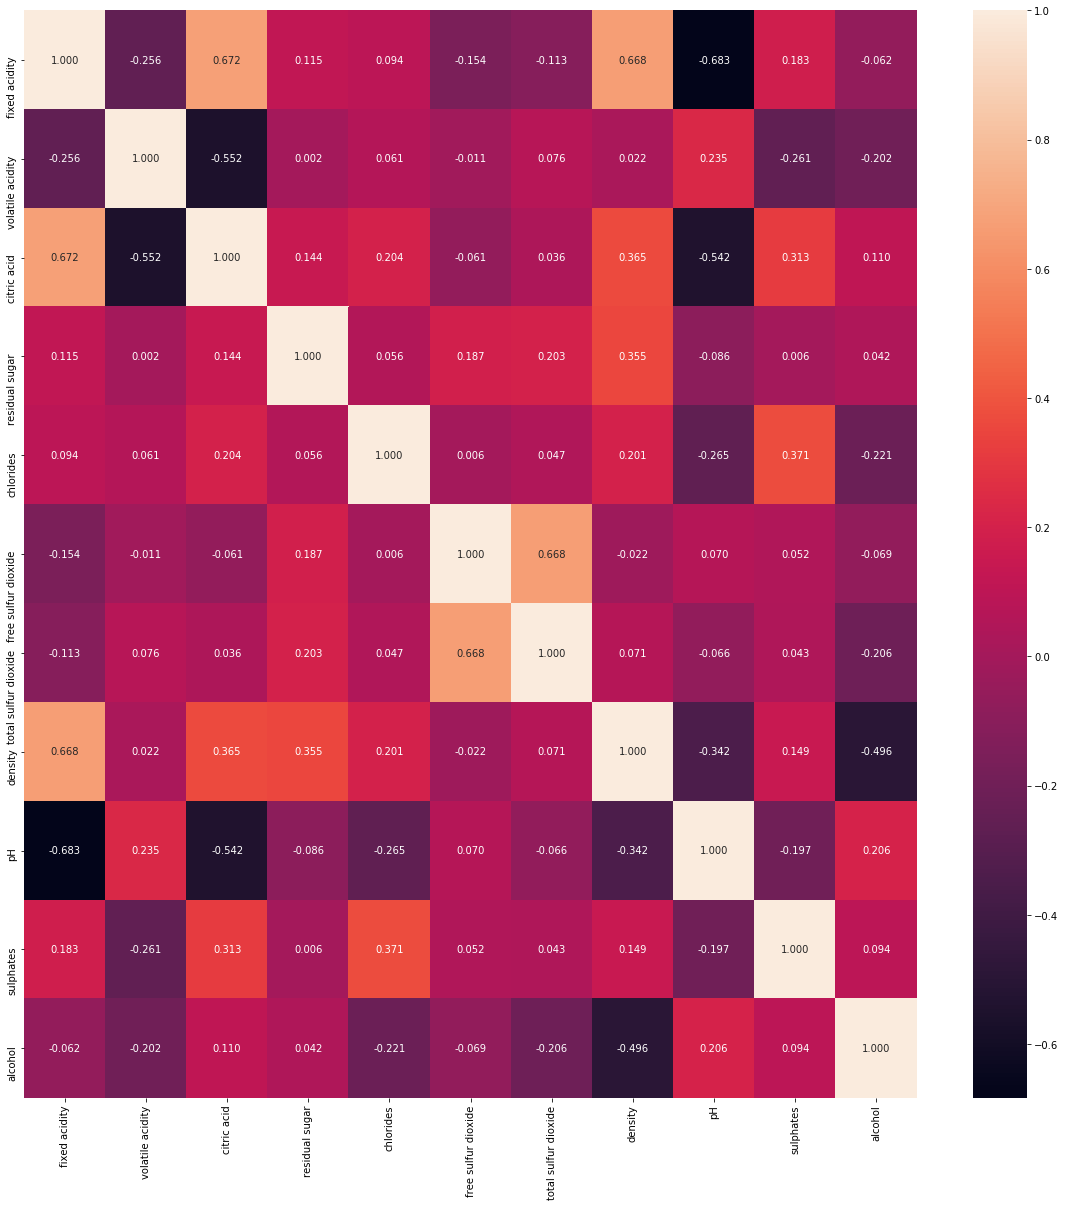

In [102]:
#Correlation
plt.figure(figsize = (20,20))
sns.heatmap(datax.corr(), annot=True, fmt = ".3f")
plt.show()

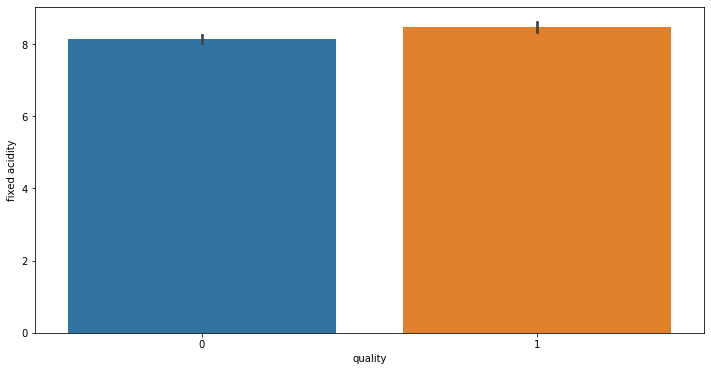

In [103]:
#Let's check the relativity of the features with Quality
fig = plt.figure(figsize = (12,6))
sns.barplot(x = datay, y=datax["fixed acidity"])
#It doesn't give us useful information

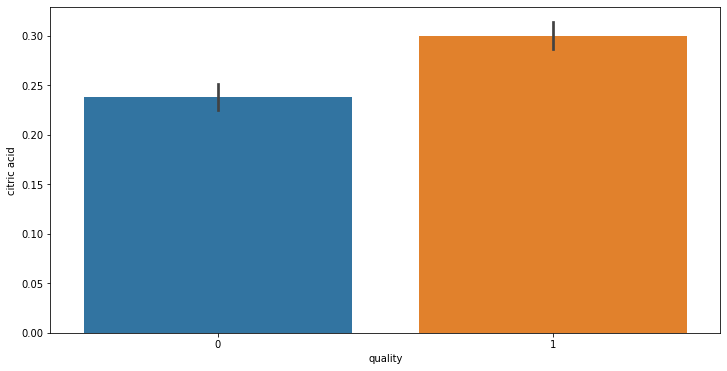

In [104]:
fig = plt.figure(figsize = (12,6))
sns.barplot(x = datay, y=datax["citric acid"])
# It shows us when citric acid increases, quality increases too.

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


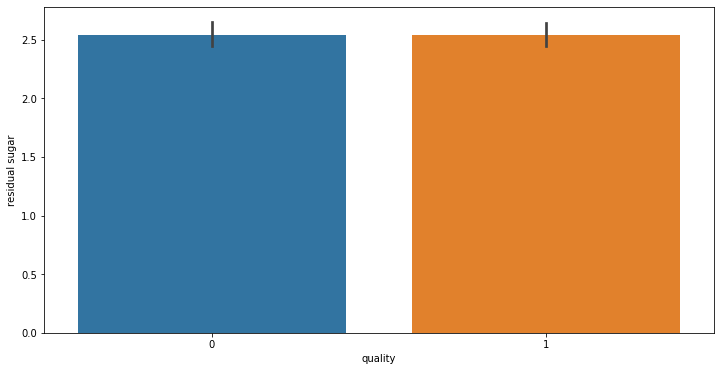

In [106]:
fig = plt.figure(figsize = (12,6))
sns.barplot(x = datay, y=datax["residual sugar"])
# Doesn't give us useful info too.

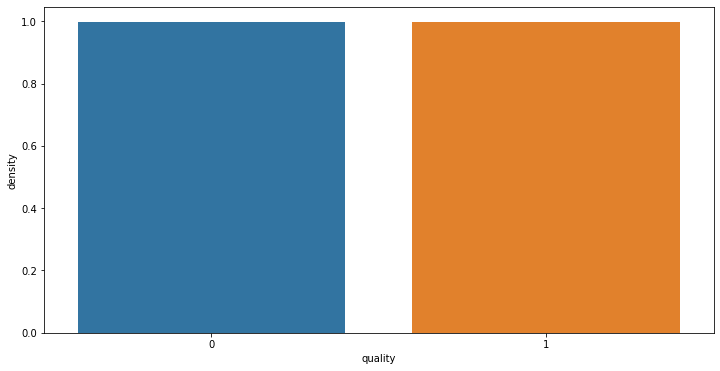

In [107]:
fig = plt.figure(figsize = (12,6))
sns.barplot(x = datay, y=datax["density"])

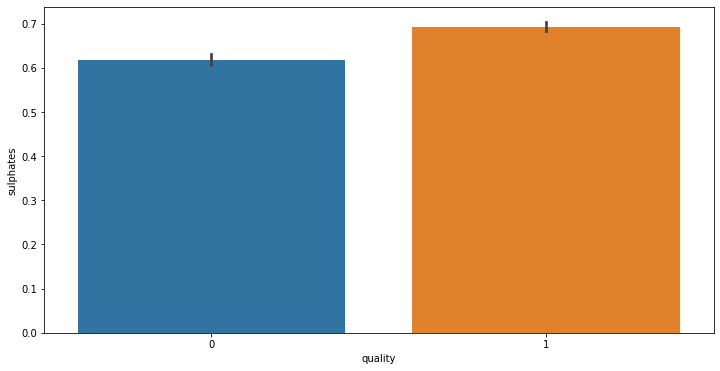

In [108]:
fig = plt.figure(figsize = (12,6))
sns.barplot(x = datay, y=datax["sulphates"])
# When sulphates increases, quality increases too

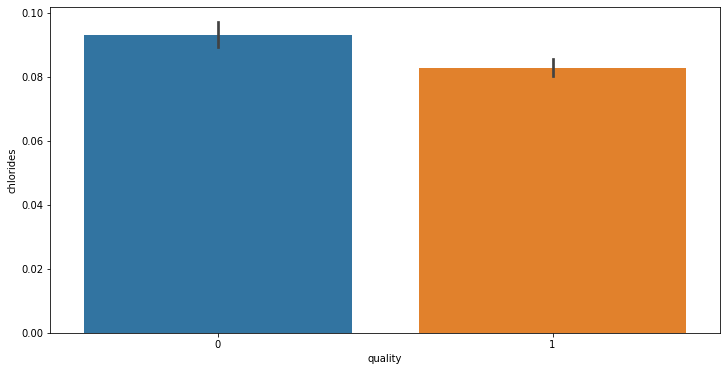

In [109]:
fig = plt.figure(figsize = (12,6))
sns.barplot(x = datay, y=datax["chlorides"])
# Interesting information, when chlorides increases, quality decreases.

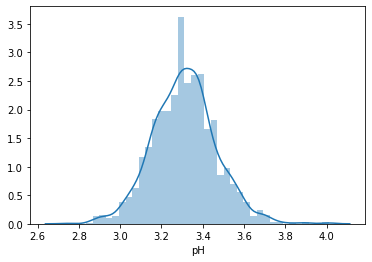

In [110]:
sns.distplot(datax["pH"]) #For instance there is an oulier in the pH feature, we need to drop it/them.

#### Outlier Detection

In [111]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [112]:
datax.loc[detect_outliers(datax,["fixed acidity","volatile acidity","citric acid","residual sugar",
                                    "chlorides","free sulfur dioxide","total sulfur dioxide","density",
                                 "pH","sulphates","alcohol"])]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
353,13.5,0.530,0.79,4.8,0.120,23.0,77.0,1.00180,3.18,0.77,13.0
364,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.0
366,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.0
374,14.0,0.410,0.63,3.8,0.089,6.0,47.0,1.00140,3.01,0.81,10.8
442,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2
538,12.9,0.350,0.49,5.8,0.066,5.0,35.0,1.00140,3.20,0.66,12.0
554,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1
555,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1
557,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1
559,13.0,0.470,0.49,4.3,0.085,6.0,47.0,1.00210,3.30,0.68,12.7


In [113]:
#datax= datax.drop(detect_outliers(datax,["fixed acidity","volatile acidity","citric acid","residual sugar",
 #                                   "chlorides","free sulfur dioxide","total sulfur dioxide","density",
 #                                "pH","sulphates","alcohol"]),axis=0).reset_index(drop=True)


In [114]:
print("Outliers have detected and dropped")

Outliers have detected and dropped


#### Train and Test Split

In [115]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(datax,datay, test_size = 0.3, random_state =42)

In [116]:
X_train.info() # We have 1119 train value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1119 entries, 925 to 1126
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1119 non-null   float64
 1   volatile acidity      1119 non-null   float64
 2   citric acid           1119 non-null   float64
 3   residual sugar        1119 non-null   float64
 4   chlorides             1119 non-null   float64
 5   free sulfur dioxide   1119 non-null   float64
 6   total sulfur dioxide  1119 non-null   float64
 7   density               1119 non-null   float64
 8   pH                    1119 non-null   float64
 9   sulphates             1119 non-null   float64
 10  alcohol               1119 non-null   float64
dtypes: float64(11)
memory usage: 104.9 KB


In [117]:
X_test.info() #And we have 480 test values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 803 to 576
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         480 non-null    float64
 1   volatile acidity      480 non-null    float64
 2   citric acid           480 non-null    float64
 3   residual sugar        480 non-null    float64
 4   chlorides             480 non-null    float64
 5   free sulfur dioxide   480 non-null    float64
 6   total sulfur dioxide  480 non-null    float64
 7   density               480 non-null    float64
 8   pH                    480 non-null    float64
 9   sulphates             480 non-null    float64
 10  alcohol               480 non-null    float64
dtypes: float64(11)
memory usage: 45.0 KB


#### Standartization the Values

In [118]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


- - 


## Machine Learning - Classification Part
- Logistic Regression
- K-Nearest Neighbour (KNN)
- Decision Tree
- Support Vector Machine (SVM) 

### - Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42, n_jobs =-1)
lr.fit(X_train,y_train)
print("Classes: ",lr.classes_)
print("Intercept: ",lr.intercept_)
print("Coef: ",lr.coef_)
print("--------------------------------------------------")
print("                                                  ")
print("Test Accuracy : %{}".format(lr.score(X_test,y_test)*100))

Classes:  [0 1]
Intercept:  [0.18650121]
Coef:  [[ 0.23040278 -0.61811941 -0.26272628  0.02636984 -0.12339392  0.26044828
  -0.57470015 -0.09620289  0.0287345   0.42507641  0.97593878]]
--------------------------------------------------
                                                  
Test Accuracy : %72.29166666666667


In [127]:
from sklearn.model_selection import train_test_split, cross_validate
cvlr = cross_validate(lr,X_train,y_train, cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test,y_test)))

Mean training accuracy: 0.7462019660411081
Test accuracy: 0.7229166666666667


#### Evaluation Metrics 
- Accuracy
- Precision
- Recall Score
- F1 Score

In [128]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

final_model = cvlr["estimator"][0]

y_pred = final_model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))

Accuracy: 0.7229166666666667
Precision: 0.7815126050420168
Recall: 0.6966292134831461
F1 Score: 0.7366336633663366


- As we see LinearRegression is not good enought to solve this problem

### - KNN

In [130]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 40) #n_neighbors is a hyperparameter that's why we need to try to examine the Optimum value 
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
# print("Prediction:",prediction) if you want to compare the test data and predictions you can remove # and try 
print("for n={} KNN Score : {}".format(40,knn.score(X_test,y_test))) 

for n=40 KNN Score : 0.7104166666666667


In [147]:
from sklearn.model_selection import train_test_split, cross_validate
cvlr = cross_validate(knn,X_train,y_train, cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test,y_test)))

Mean training accuracy: 0.7462019660411081
Test accuracy: 0.7229166666666667


- In the KNN algorithm n number is a hyperparameter that's why if we choose the optimum n, we'll access to optimum accuracy

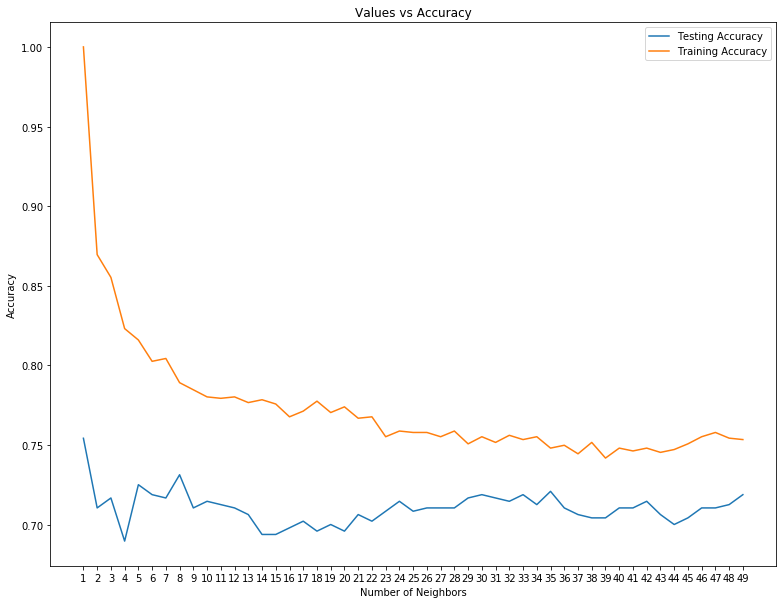

Best Accuracy : 0.7541666666666667 with K : 1


In [134]:
neig = np.arange(1,50)
train_accuracy = []
test_accuracy = []
#Loop all over in k values
for i,k in enumerate(neig):
    knn3 = KNeighborsClassifier(n_neighbors = k)
    #Fit process
    knn3.fit(X_train,y_train)
    #Train Accuracy
    train_accuracy.append(knn3.score(X_train,y_train))
    #Test Accuracy
    test_accuracy.append(knn3.score(X_test,y_test))
    
#Plotting the Values 
plt.figure(figsize =(13,10))
plt.plot(neig, test_accuracy, label = "Testing Accuracy")
plt.plot(neig, train_accuracy, label = "Training Accuracy")
plt.legend()
plt.title("Values vs Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.xticks(neig) #We limit the Max min values in the plot axis according to Number of max neighbor
plt.savefig("graph.png")
plt.show()
print("Best Accuracy : {} with K : {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [148]:
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors = 1) #n_neighbors is a hyperparameter that's why we need to try to examine the Optimum value 
knn2.fit(X_train,y_train)
prediction = knn2.predict(X_test)
# print("Prediction:",prediction) if you want to compare the test data and predictions you can remove # and try 
print("for n={} KNN Score : {}".format(1,knn.score(X_test,y_test))) 

for n=1 KNN Score : 0.7541666666666667


### - Decision Tree

In [152]:
from sklearn.tree import DecisionTreeClassifier 

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.741733690795353
Accuracy of test: 0.7020833333333333


In [138]:
# Classification Report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.52      0.61       213
           1       0.69      0.85      0.76       267

    accuracy                           0.70       480
   macro avg       0.71      0.68      0.68       480
weighted avg       0.71      0.70      0.69       480



In [139]:
# Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.7106060606060606
Recall = 0.683309595400116
Accuracy = 0.7020833333333333
F1 Score = 0.6832648088929496


### - Support Vector Machine

In [141]:
from sklearn.svm import SVC
svm = SVC(random_state = 42)
svm.fit(X_train,y_train)
predsvm = svm.predict(X_test)
print("Accuracy of the SVM Algorithm: ",svm.score(X_test,y_test))

Accuracy of the SVM Algorithm:  0.7479166666666667


In [142]:
# Metrics
print("Precision = {}".format(precision_score(y_test, predsvm, average='macro')))
print("Recall = {}".format(recall_score(y_test, predsvm, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, predsvm)))
print("F1 Score = {}".format(f1_score(y_test, predsvm,average='macro')))

Precision = 0.7474651017431766
Recall = 0.7506198238117845
Accuracy = 0.7479166666666667
F1 Score = 0.7469931477310844


-------------------------------------------------

### General Comparison without Hyperparameter Tuning

In [143]:
print("Test Accuracy for Logistic Regression: %{}".format(lr.score(X_test,y_test)*100))
print("for n={} KNN Score : %{}".format(1,knn.score(X_test,y_test)*100))
print("Accuracy of the SVM Algorithm : %{}".format(svm.score(X_test,y_test)*100))
print("Accuracy of the Decision Tree : %{}".format(clf.score(X_test,y_test)*100))

Test Accuracy for Logistic Regression: %72.29166666666667
for n=1 KNN Score : %75.41666666666667
Accuracy of the SVM Algorithm : %74.79166666666667
Accuracy of the Decision Tree : %70.20833333333333


--------------------------------------------------------

### Hyperparameter Tuning

In [160]:
random_state = 42 
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split": range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel": ["rbf"],
                 "gamma": [0.001,0.01,0.1, 1],
                 "C" : [1, 10, 50, 100, 200, 300, 1000]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty" : ["l1","l2"]}

knn_param_grid ={"n_neighbors":np.linspace(1,19,10,dtype = int).tolist(),
                "weights": ["uniform","distance"],
                "metric":["euclidean","manhattan"]}

classifier_param = [dt_param_grid,
                   svc_param_grid,
                   logreg_param_grid,
                   knn_param_grid ]

In [164]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [165]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 2205 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 2485 out of 2500 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


0.7408301158301158
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


0.7685971685971685
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


0.7551480051480051
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s


0.7989623552123553


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.7s finished


Text(0.5, 1.0, 'Cross Validation Scores')

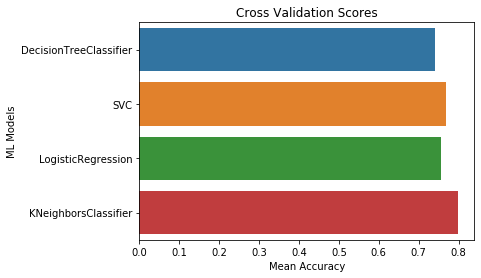

In [167]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVC","LogisticRegression",
                         "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

References
- https://www.kaggle.com/semihakmese/pima-ind-ans-diabetes-basic-ml-solutions
- https://www.kaggle.com/semihakmese/titanic-eda-semihakmese
- https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine